# ANALIZA OFERT SPRZEDAŻY SAMOCHODÓW DOSTĘPNYCH NA SERWISIE OTOMOTO.PL

dane zebrane ze strony (websrapping) w dniu 13.10.22

In [45]:
# pobiernie danych
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import squarify as sq
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')

%matplotlib inline
url = 'https://github.com/viseryon/rep1/blob/main/samochodycsv.csv?raw=true'
df = pd.read_csv(url)
# df = pd.read_csv(r'C:\Users\alans\OneDrive\Pulpit\samochodycsv.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151360 entries, 0 to 151359
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TYTUŁ                  151360 non-null  object 
 1   OPIS                   145387 non-null  object 
 2   ROK_PRODUKCJI          133434 non-null  float64
 3   PRZEBIEG_KM            133428 non-null  float64
 4   POJEMNOŚĆ_SILNIKA_CM3  151147 non-null  float64
 5   PALIWO                 151360 non-null  object 
 6   MIASTO                 151360 non-null  object 
 7   WOJEWODZTWO            151360 non-null  object 
 8   OSTATNIA_AKTUALIZACJA  151360 non-null  object 
 9   CENA                   151360 non-null  int64  
 10  WALUTA                 151360 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.7+ MB


In [46]:
opis = df.describe().astype(float).round(2)
opis

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
count,133434.00,133428.00,151147.00,151360.00
mean,2012.26,163780.14,1937.82,58182.77
std,6.46,92678.99,836.82,65131.86
min,1937.00,1.00,480.00,1250.00
25%,2009.00,94296.00,1469.00,17900.00
50%,2012.00,179010.00,1798.00,35800.00
75%,2017.00,224000.00,1997.00,74999.00
max,2023.00,1943000.00,7990.00,1966770.00


Proces zbierania danych trwał ok 2,5h. Łącznie w pliku znalazło się 151 360 ofert (count z CENA, gdyż nie wszystkie oferty miały wypełnione rubryki np. z rokiem produkcji).

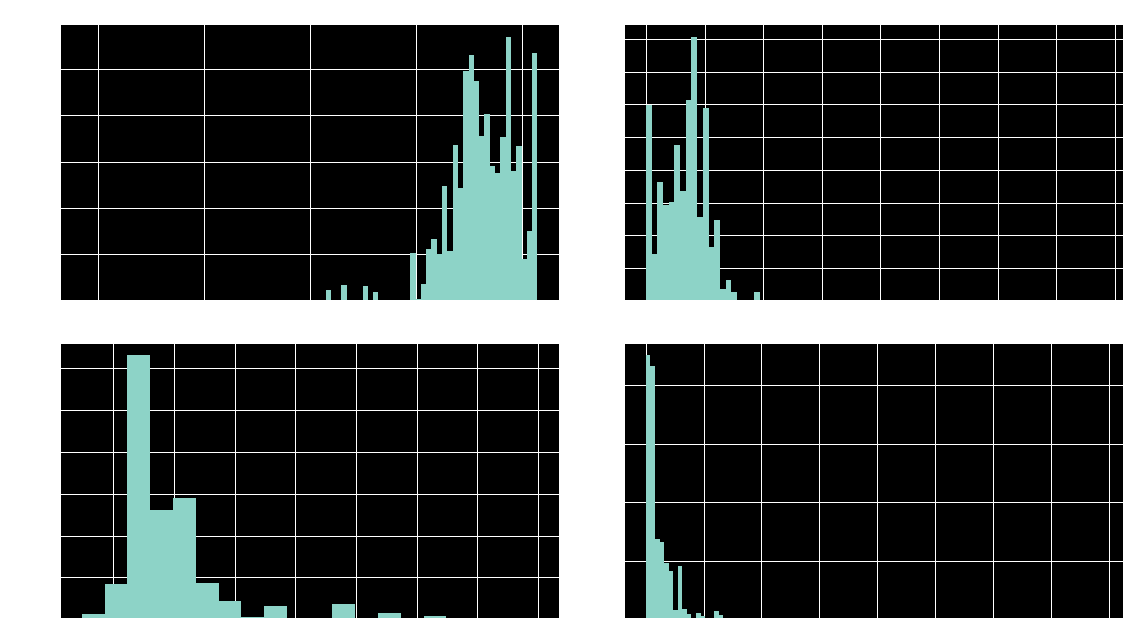

In [47]:
zmienne = [['ROK_PRODUKCJI', df.ROK_PRODUKCJI], ['PRZEBIEG', df.PRZEBIEG_KM], ['POJEMNOSC_SILNIKA_CM3', df.POJEMNOŚĆ_SILNIKA_CM3], ['CENA', df.CENA]]
bins = [86, 80, 20, 100]
plt.figure(figsize=(16,9))
for i, zmienna in enumerate(zmienne):

    ax = plt.subplot(2, 2, i + 1)

    ax.hist(zmienna[1], bins = bins[i])
    ax.ticklabel_format(style='plain')
    ax.set_ylabel('Liczba samochodów')
    ax.set_title(zmienna[0])
    
plt.tight_layout()
plt.show()

W ofertach pojawiają się wartości zupełnie skrajne co powoduje asymetrię rozkładów. Warto by było obliczyć zróżnicowanie.

In [48]:
lst = []
for i, tyt in enumerate(opis):
    lst.append([tyt, (opis.iloc[2,i] / opis.iloc[1,i] * 100).round(2)])
for l, i in lst:
    if i <= 20:
        print(f'Rozkład zmiennej {l:25} charakteryzuje się bardzo słabym zróżnicowaniem.')
    elif 20 < i <= 40:
        print(f'Rozkład zmiennej {l:25} charakteryzuje się słabym zróżnicowaniem.')
    elif 40 < i <= 60:
        print(f'Rozkład zmiennej {l:25} charakteryzuje się umiarkowanym zróżnicowaniem.')
    elif 60 < i <= 80:
        print(f'Rozkład zmiennej {l:25} charakteryzuje się silnym zróżnicowaniem.')
    else:
        print(f'Rozkład zmiennej {l:25} charakteryzuje się bardzo silnym zróżnicowaniem.')

Rozkład zmiennej ROK_PRODUKCJI             charakteryzuje się bardzo słabym zróżnicowaniem.
Rozkład zmiennej PRZEBIEG_KM               charakteryzuje się umiarkowanym zróżnicowaniem.
Rozkład zmiennej POJEMNOŚĆ_SILNIKA_CM3     charakteryzuje się umiarkowanym zróżnicowaniem.
Rozkład zmiennej CENA                      charakteryzuje się bardzo silnym zróżnicowaniem.


In [49]:
avg_cena = opis['CENA'][1]
avg_przebieg = opis['PRZEBIEG_KM'][1]
avg_pojemnosc = opis['POJEMNOŚĆ_SILNIKA_CM3'][1]
avg_rok = opis['ROK_PRODUKCJI'][1]
f'Średni samochód został wyprodukowany w {int(avg_rok)} i po przejechaniu {avg_przebieg} km kosztowałby {avg_cena} zł.'

'Średni samochód został wyprodukowany w 2012 i po przejechaniu 163780.14 km kosztowałby 58182.77 zł.'

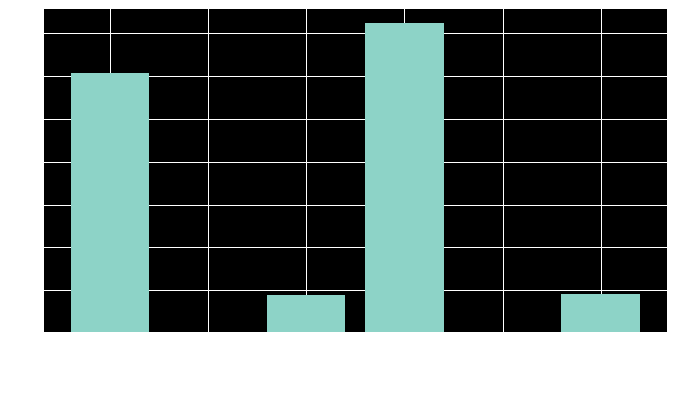

In [50]:
p = df.groupby(df.PALIWO).count()
p = pd.DataFrame(p['CENA']).reset_index()
plt.figure(figsize=(10,6))
plt.bar(p.PALIWO, p.CENA,)
plt.xticks(rotation=45)
plt.show()

Z wykresu dobrze widać, ze samochody elektryczne niemalże nie istnieją na rynku wtórnym w Polsce, gdyż jest ich zaledwie...

In [51]:
df[df.PALIWO == "Elektryczny"].CENA.count()

123

... i średnio kosztują więcej o...

In [52]:
diff = df[df.PALIWO == 'Elektryczny'].CENA.mean().round(2) / df[df.PALIWO != 'Elektryczny'].CENA.mean().round(2) - 1
f'{(diff * 100).round(2)}%'

'389.45%'

Można się przyjrzeć też innym czynnikom, które mogą wpływać na cenę samochodu.

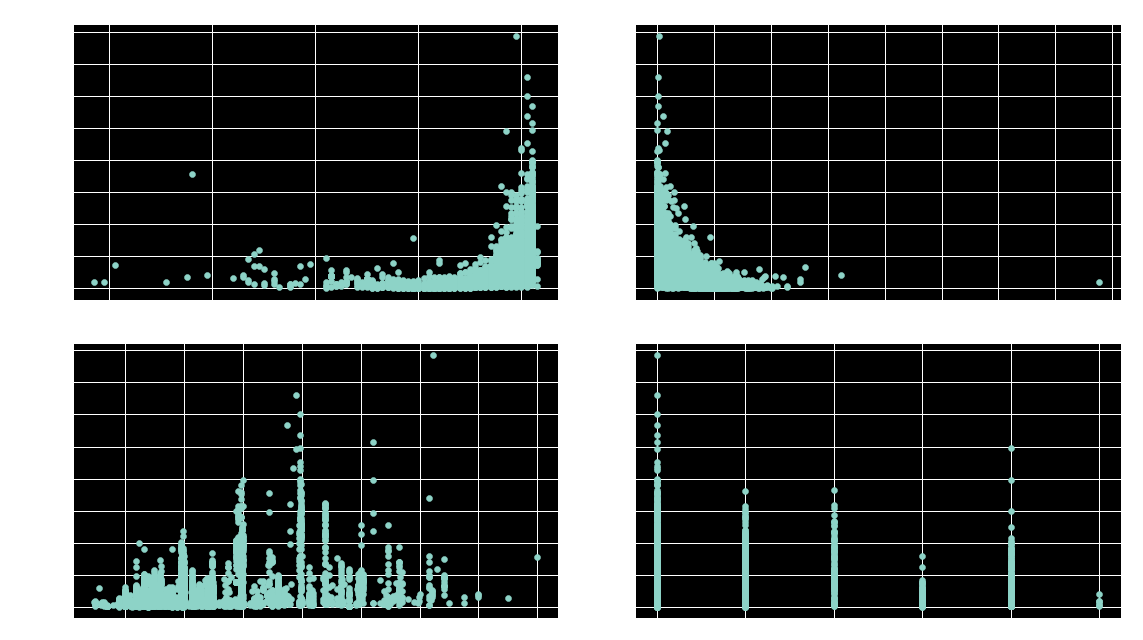

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
ROK_PRODUKCJI,1.000000,-0.640153,-0.017929,0.609579
PRZEBIEG_KM,-0.640153,1.000000,0.087712,-0.641472
POJEMNOŚĆ_SILNIKA_CM3,-0.017929,0.087712,1.000000,0.220832
CENA,0.609579,-0.641472,0.220832,1.000000


In [53]:
zmienne = [['ROK_PRODUKCJI', df.ROK_PRODUKCJI], ['PRZEBIEG', df.PRZEBIEG_KM], ['POJEMNOSC_SILNIKA_CM3', df.POJEMNOŚĆ_SILNIKA_CM3], ['PALIWO', df.PALIWO]]

plt.figure(figsize=(16,9))
for i, zmienna in enumerate(zmienne):
    ax = plt.subplot(2, 2, i + 1)

    ax.scatter(zmienna[1], df.CENA)
    try:
        ax.ticklabel_format(style='plain')
    except: pass

    ax.set_ylabel('Cena samochodu')
    ax.set_title(zmienna[0])
    
plt.tight_layout()
plt.show()
df.corr(numeric_only=True)

I widzimy, że występuje silna korelacja między ceną i rokiem produckji samochodu. Silnie negatywna korelacja występuje w przypadku zmiennych ceny i przebiegu, więc jeśli przbieg rośnie to cena maleje.
Co ciekawe pojemność silnika nie ma niemalże wpływu na kształtowanie się ceny pojazdu.

Spójrzmy teraz na marki samochodów. Marka zawsze stoi na pierwszej pozycji w ogłoszeniu OTOMOTO, więc można ją wyciągnąć z tytułu i dodać do DataFrame jako kolumna 'MARKA'.

In [54]:
marka = []

for i in range(len(df.CENA)):
    samo = df.iloc[i, 0]
    try:
        x = samo[:samo.index(' ')].capitalize()
    except: 
        marka.append(x)
        continue
    marka.append(x)

df['MARKA'] = marka

Marka została dodana. Spójrzmy więc na udział 10 

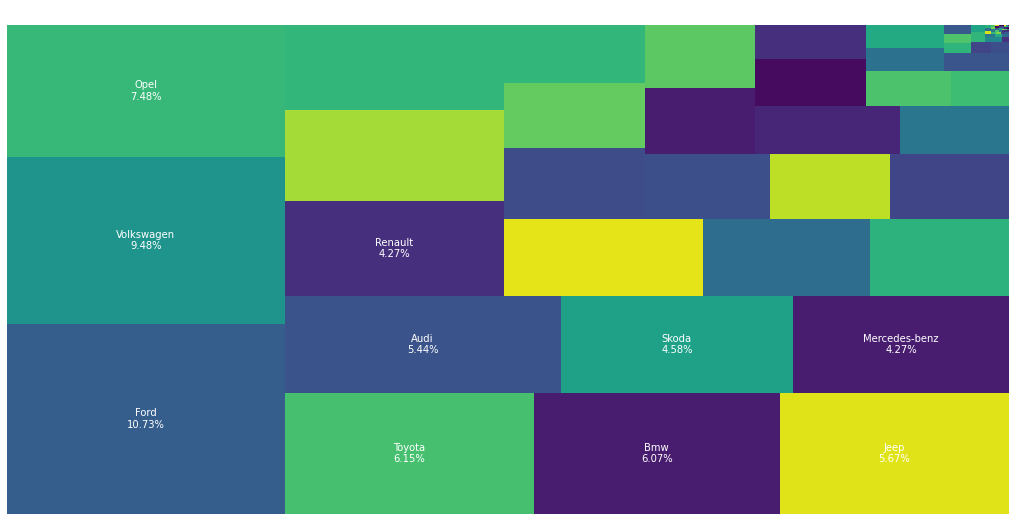

In [55]:
plt.figure(figsize=(16,9))
a = df.groupby(df.MARKA).count().sort_values('TYTUŁ', ascending=False)
a = a.TYTUŁ.reset_index()
labels = []
for i in range(len(a)):
    if i >= 10:
        labels.append('')
    else:
        s = a.iloc[i, 0]
        l = a.iloc[i, 1] / a.TYTUŁ.sum() * 100
        l = l.round(2)
        labels.append(f'{s}\n{l}%')
sq.plot(a.TYTUŁ, label=labels)
plt.axis('off')
plt.title('Liczba samochodów z podziałem na markę')
plt.show()

Z wykresu możemy odczytać 10 marek samochodów z największą liczbą ofert na OTOMOTO. Ponad 10% wszystkich samochodów na sprzedaż jest marki Ford. Tuż za nim stoi Volkswagen.

Możemy odtworzyć heatmapę giełdową, licząc 'kapitalizację' tych marek, traktując jedną ofertę jak jedną akcję.

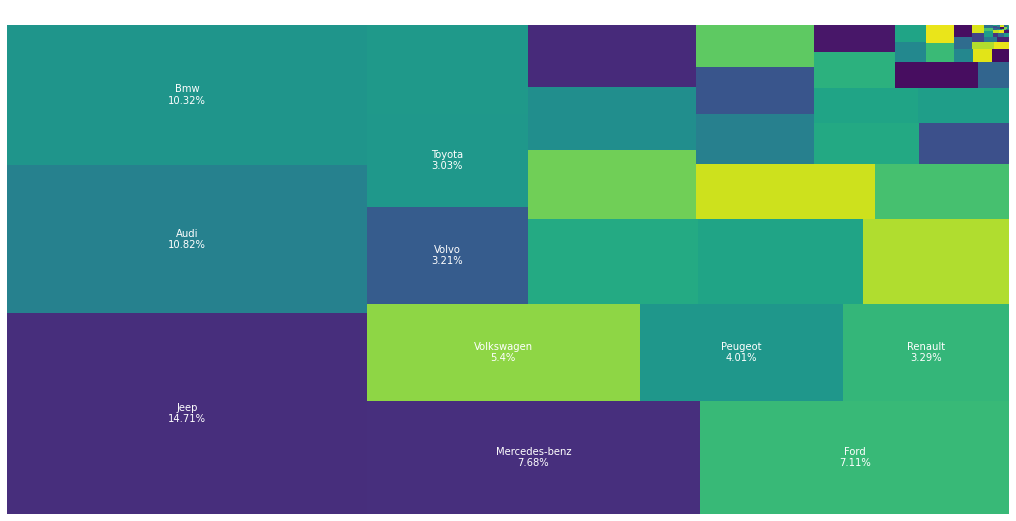

In [56]:
kap = df.groupby(df.MARKA).sum(numeric_only=True).sort_values('CENA', ascending=False)
kap = kap.CENA.reset_index()
plt.figure(figsize=(16,9))
labels = []
for i in range(len(kap)):
    if i >= 10:
        labels.append('')
    else:
        s = kap.iloc[i, 0]
        l = kap.iloc[i, 1] / kap.CENA.sum() * 100
        l = l.round(2)
        labels.append(f'{s}\n{l}%')
sq.plot(kap.CENA, label=labels)
plt.axis('off')
plt.title('"Kapitalizacja" marek samochodów')
plt.show()

Z porównania dwóch powyższych wykresów można wywnioskować, że średnia cena samochodu JEEP jest wyższa od Forda, BMW, Toyoty czy Volkswagena.

Tak więc rynek wtórny samochodów osobowych, bazując na ofertach z OTOMOTO, jest skupiony wokół silników spalinowych. Świadczy o tym liczba ofert, średnia cena samochodów elektrycznych oraz bardzo mały udział w rynku marek, które zajmują się głównie produkcją samochodów elektrycznych, jak Tesla, Nio.
W ofertach dominują przede wszystkim samochody klasy średniej, jak Fordy, Ople, Volkswageny i Toyoty. O byciu premium marek takich jak BMW, Audi, czy Mercedes świadczy ich podwyższony udział w 'kapitalizacji' rynku.